In [4]:
#Data Analysis and Decision Tree Regressor for "WALMART STORE DATA".
#Author - Soumedhik Bharati.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('C:\\Users\\sumit\\Documents\\Datasets\\walmart_cleaned.csv')

In [7]:
#understanding the data

In [8]:
data.head() #Top 5 values

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [9]:
data.tail() #Bottom 5 values

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421569,423285,45,2012-10-26,0,98.0,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


In [10]:
data.shape #Shows the shape of the numpy array storing the dataset.

(421570, 17)

In [11]:
data.describe() #statistical values regarding data

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,211611.321278,22.200546,0.070358,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,2.410088,136727.915739
std,122195.149363,12.785297,0.255750,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,0.000000,1.000000,0.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,34875.000000
25%,105782.250000,11.000000,0.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,2.000000,93638.000000
50%,211603.500000,22.000000,0.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,3.000000,140167.000000
75%,317424.750000,33.000000,0.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,3.000000,202505.000000
max,423285.000000,45.000000,1.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,3.000000,219622.000000


In [12]:
data.columns #shows all of the column headers present in the dataset

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [13]:
data.nunique() #unque values present in the data(no repeats)

Unnamed: 0      421570
Store               45
Date               143
IsHoliday            2
Dept                81
Weekly_Sales    359464
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64

In [14]:
data['IsHoliday'].nunique() #shows all the unique values present in a specific column

2

In [15]:
#cleaning the dataset

In [16]:
data.isnull().sum() #shows the sum of all the null values present inside the data for preprocessing

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [17]:
data = data.drop(['Date','Temperature','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1)
#Removing irrelevant columns to present a cleaner data to the model

In [18]:
data.head()

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Fuel_Price,CPI,Unemployment,Type,Size
0,0,1,0,1.0,24924.50,2.572,211.096358,8.106,3,151315
1,1,1,0,26.0,11737.12,2.572,211.096358,8.106,3,151315
2,2,1,0,17.0,13223.76,2.572,211.096358,8.106,3,151315
3,3,1,0,45.0,37.44,2.572,211.096358,8.106,3,151315
4,4,1,0,28.0,1085.29,2.572,211.096358,8.106,3,151315


In [19]:
#Relationship analysis

In [20]:
correlation = data.corr() #data.corr() is used to find the pairwise correlation of all columns

<Axes: >

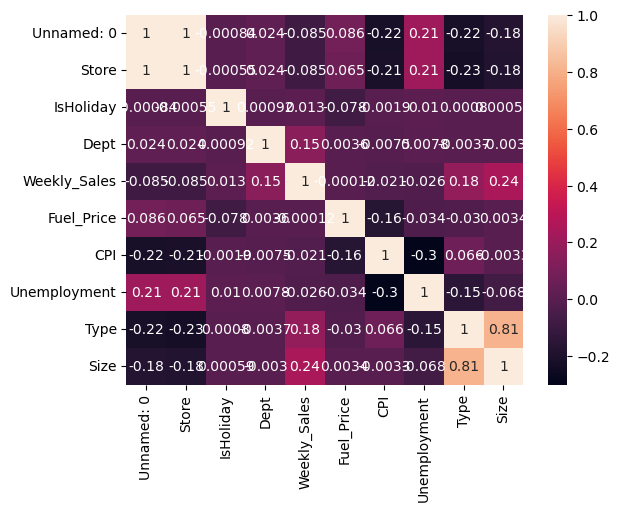

In [21]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)
#heatmap() annot (annotation) feature allows you to show the numerical value associated with each cell in a python seaborn heatmap

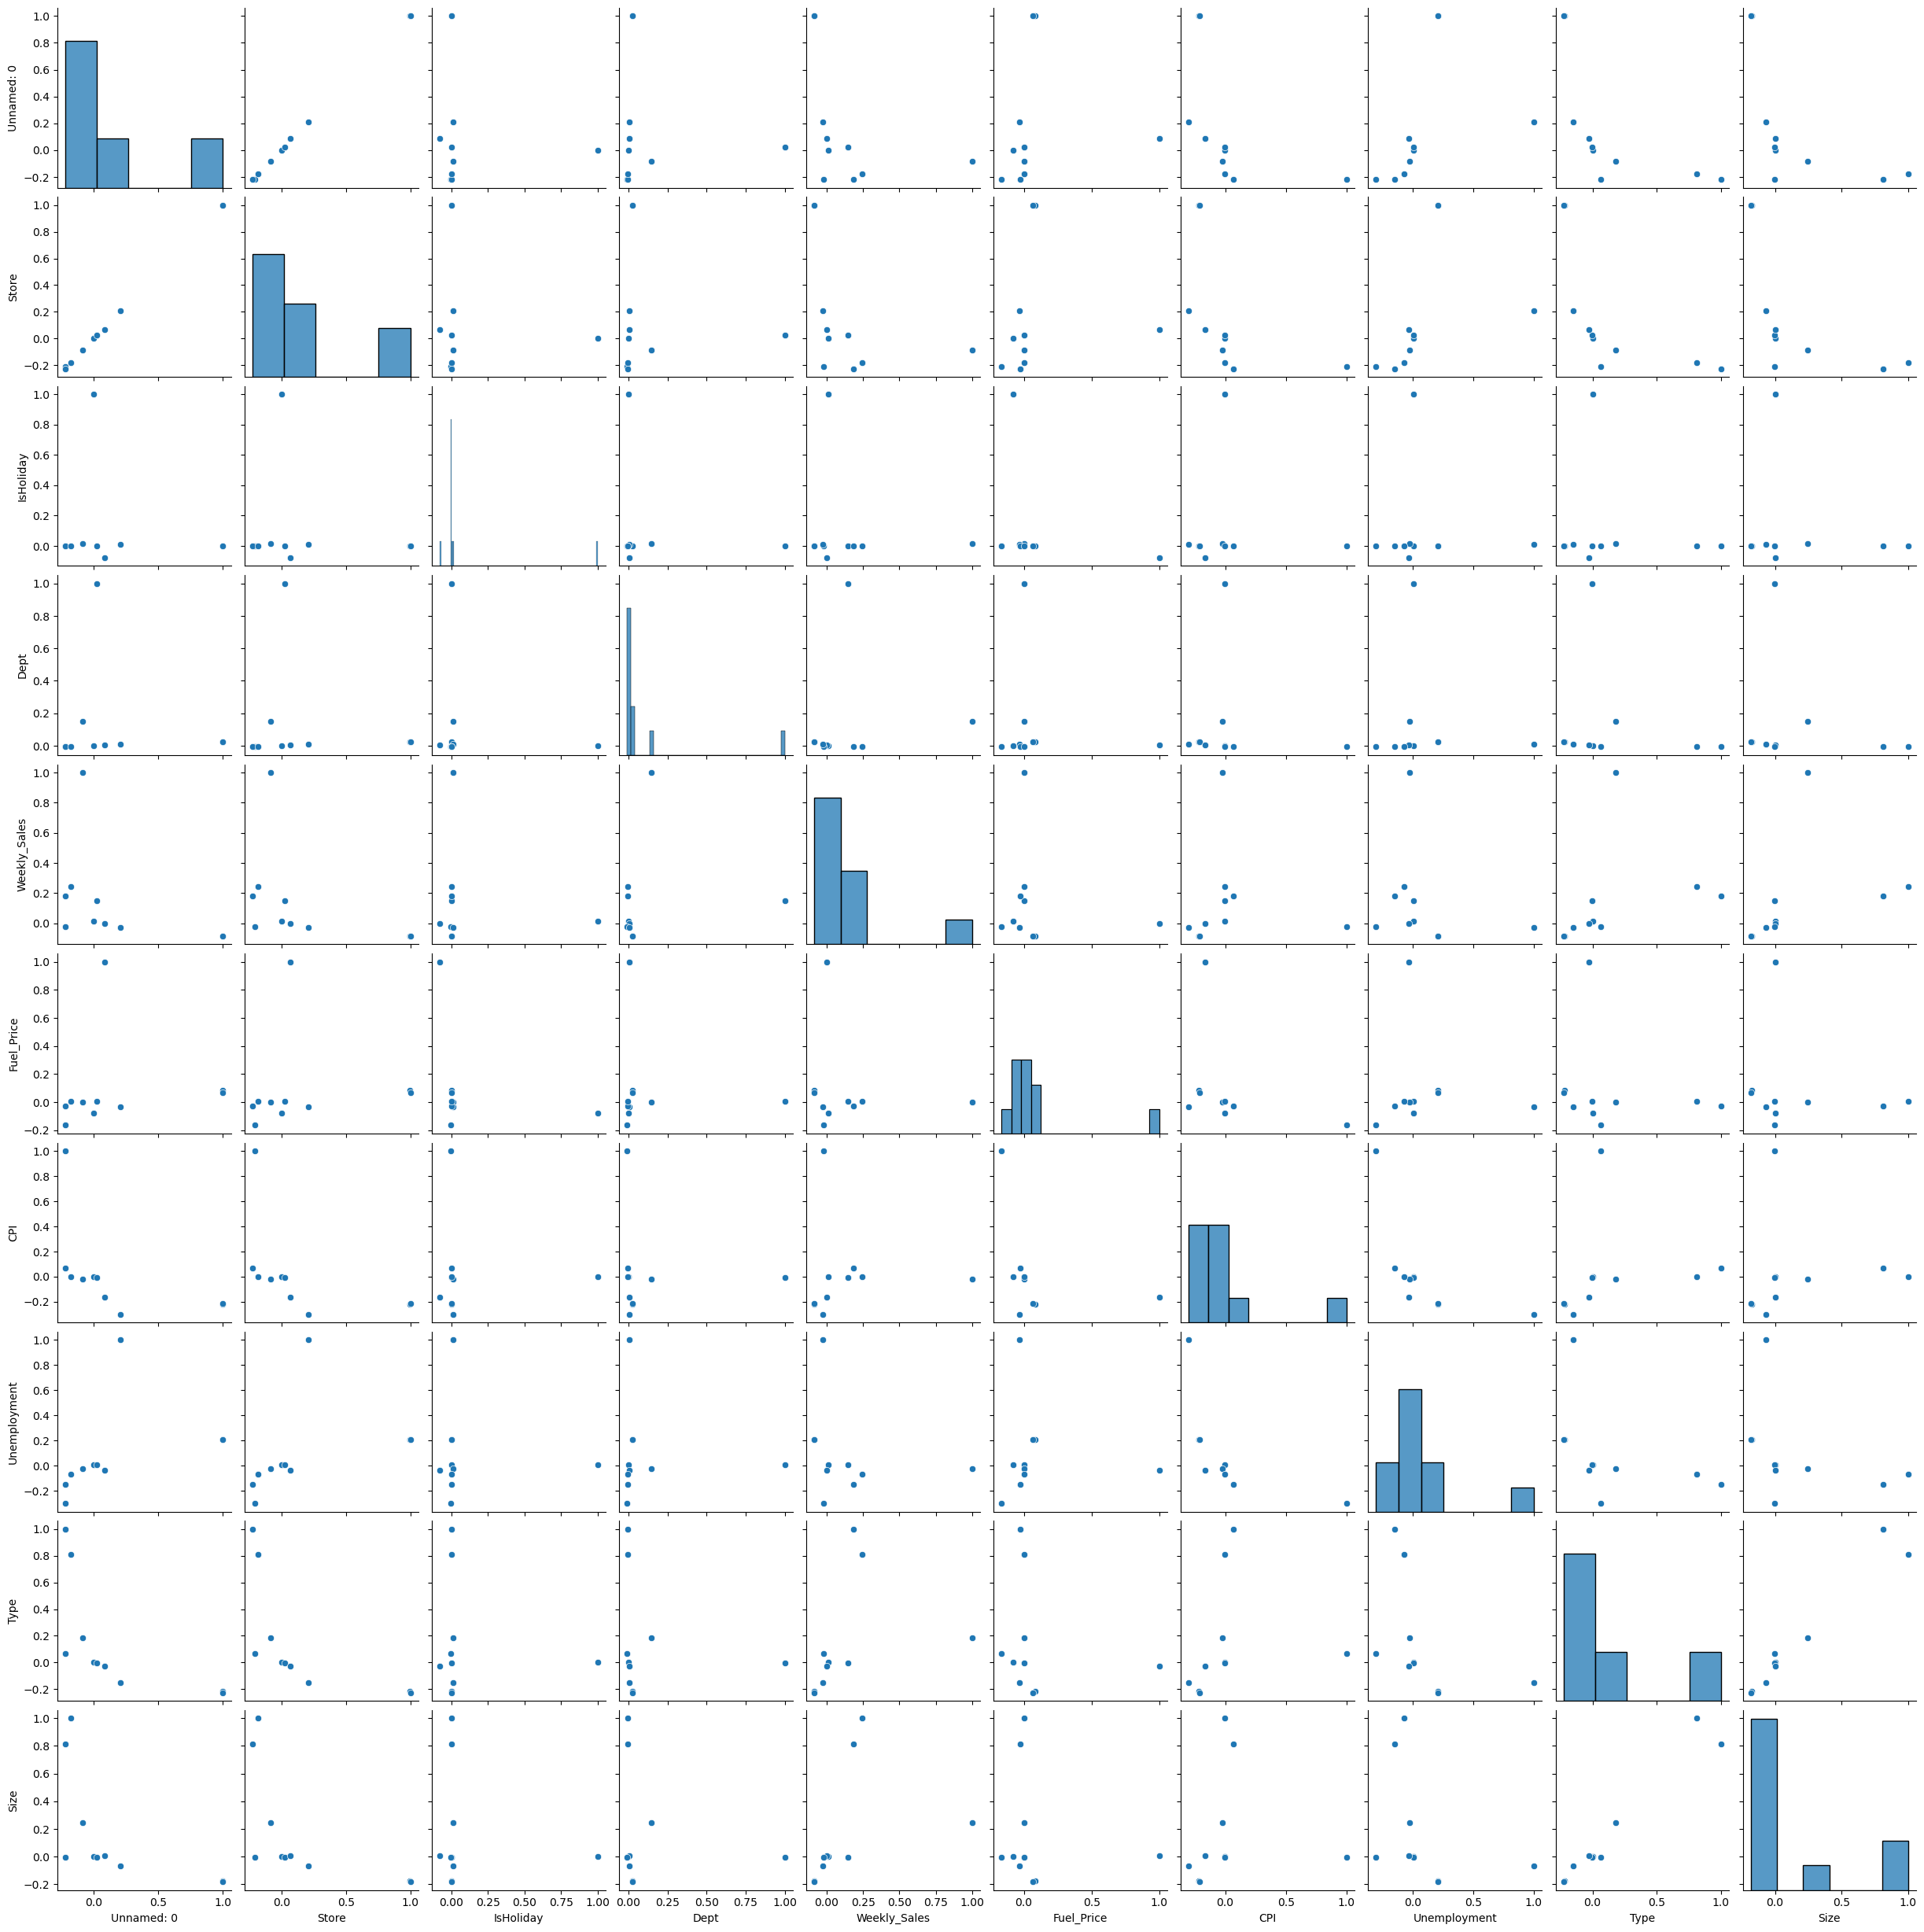

In [22]:
sns.pairplot(correlation)
#Plot pairwise relationships in a dataset.

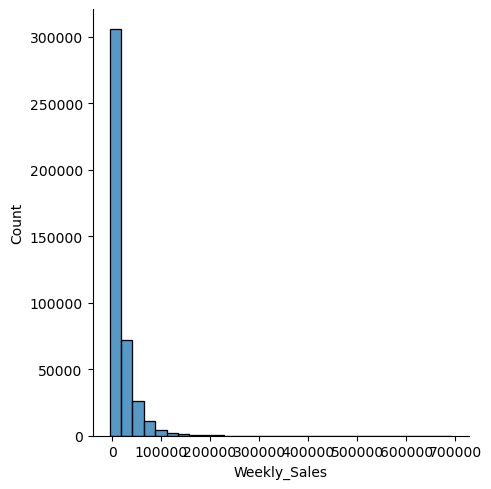

In [23]:
sns.displot(data['Weekly_Sales'], bins= 30)

In [24]:
#Assigning dataset into X and Y

In [25]:
data.head(10)

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Fuel_Price,CPI,Unemployment,Type,Size
0,0,1,0,1.0,24924.50,2.572,211.096358,8.106,3,151315
1,1,1,0,26.0,11737.12,2.572,211.096358,8.106,3,151315
2,2,1,0,17.0,13223.76,2.572,211.096358,8.106,3,151315
3,3,1,0,45.0,37.44,2.572,211.096358,8.106,3,151315
4,4,1,0,28.0,1085.29,2.572,211.096358,8.106,3,151315
5,5,1,0,79.0,46729.77,2.572,211.096358,8.106,3,151315
6,6,1,0,55.0,21249.31,2.572,211.096358,8.106,3,151315
7,7,1,0,5.0,32229.38,2.572,211.096358,8.106,3,151315
8,8,1,0,58.0,7659.97,2.572,211.096358,8.106,3,151315
9,9,1,0,7.0,21084.08,2.572,211.096358,8.106,3,151315


In [26]:
X = data.drop("Weekly_Sales", axis=1) #X represents the input dataset for both train and test case
X

,Unnamed: 0,Store,IsHoliday,Dept,Fuel_Price,CPI,Unemployment,Type,Size
0,0,1,0,1.0,2.572,211.096358,8.106,3,151315
1,1,1,0,26.0,2.572,211.096358,8.106,3,151315
2,2,1,0,17.0,2.572,211.096358,8.106,3,151315
3,3,1,0,45.0,2.572,211.096358,8.106,3,151315
4,4,1,0,28.0,2.572,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...
421565,423281,45,0,13.0,3.882,192.308899,8.667,2,118221
421566,423282,45,0,16.0,3.882,192.308899,8.667,2,118221
421567,423283,45,0,32.0,3.882,192.308899,8.667,2,118221
421568,423284,45,0,83.0,3.882,192.308899,8.667,2,118221


In [27]:
Y = data["Weekly_Sales"] #Y represents the ideal output (correct output) data for both train and test case
Y 

0         24924.50
1         11737.12
2         13223.76
3            37.44
4          1085.29
            ...   
421565    26240.14
421566     2660.02
421567     4131.54
421568      717.82
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split #train_test_split splits a dataset into X_train, X_test, Y_train, Y_test which are input and output (ideal) data for both training set and test set respectively. Also, here, test_case is '0.2' which indicates that the dataset will be divided into 20% test data and 80% training data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((337256, 9), (337256,), (84314, 9), (84314,))

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()  #This creates an object of the DecisionTreeRegressor() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [30]:
parameters = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    "max_depth": [5, 10, 15, None],
    "splitter": ["best", "random"]
} #Preparing parameters for GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid= parameters, cv = 10, n_jobs=-1) #creating an object of the GridSearchCV class for parameters to be passed.
grid

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [5, 10, 15, None],
                         'splitter': ['best', 'random']})

In [32]:
grid.fit(X_train, Y_train) #Passing X_train and Y_train for GridSearchCV to help find best parameters for this model.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [5, 10, 15, None],
                         'splitter': ['best', 'random']})

In [33]:
grid.best_params_ #displays the best(ideal) parameters for Regressor Model for best accuracy

{'criterion': 'friedman_mse', 'max_depth': None, 'splitter': 'best'}

In [34]:
grid.best_score_ #Displays highest possible accuracy with the best possible set of parameters

0.8949681068846722

In [35]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion = "friedman_mse", max_depth = None, splitter = "best")  #This creates an object of the DecisionTreeRegressor() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [36]:
y_pred = model.predict(X_test) #generate a prediction matrix for predicted values for comparing to original values = Y_test.

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Absolute Error: 2256.5667791825795
Mean Squared Error: 48983249.36113522


In [ ]:
#Thus, this concludes the data analysis and the process of correctly training the "Decision Tree Regressor Model" wherein we achieved a prediction of 89.5 % (0.8946).